# Notebook for Master Thesis
Author: Youri Senders <br/>
Student Number: 2018966 <br/>
ANR: 895590 <br/>

Title: The Impact of Stemming and Lemmatization in Predicting Sentiment Polarity of Twitter data <br/>
Dataset: Sentiment140 <br/>
Date: Feb 2021 - June 2021

This notebook is used for conducting the extra results. It is a seperate notebook because running the main notebook again is time-consuming!

# Part I: Loading models and preprocess test data
The first part consists of loading all the W2V and SVM models trained in the main notebook. The test set needs to be cleaned again. Hence, most of this part is repetitive to the main document. See part II for the results

In [1]:
%matplotlib inline
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
warnings.simplefilter(action='ignore')

In [2]:
from gensim.models import Word2Vec, KeyedVectors
w2v_baseline = Word2Vec.load("model_w2v_baseline")
w2v_porter = Word2Vec.load("model_w2v_porter")
w2v_snowball = Word2Vec.load("model_w2v_snowball")
w2v_lancaster = Word2Vec.load("model_w2v_lancaster")
w2v_lemma = Word2Vec.load("model_w2v_lemma")
w2v_lovins = Word2Vec.load("model_w2v_lovins")

In [3]:
import joblib as joblib
SVM_baseline = joblib.load('model_SVM_baseline.pkl')
SVM_porter = joblib.load('model_SVM_porter.pkl')
SVM_snowball = joblib.load('model_SVM_snowball.pkl')
SVM_lancaster = joblib.load('model_SVM_lancaster.pkl')
SVM_lemma = joblib.load('model_SVM_lemma.pkl')
SVM_lovins = joblib.load('model_SVM_lovins.pkl')

In [4]:
header_list = ["label", "id", "date", "flag", "username", "content"]

In [5]:
df_test = pd.read_csv("testdata.manual.2009.06.14.csv", encoding='latin-1', names=header_list)
df_test

,label,id,date,flag,username,content
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,Ask Programming: LaTeX or InDesign?: submitted...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [6]:
# drop neutral tweets
def drop_neutral(labels):
    count = 0
    list_neutral = []
    for label in labels:
        print(label)
        if label == 2:
            list_neutral.append(count)
        count += 1
    print(count)
    return list_neutral

neutral_index = drop_neutral(df_test['label'])
print(neutral_index)

4
4
4
4
4
4
0
4
4
4
2
0
4
4
0
4
0
4
0
4
4
4
4
4
4
4
4
4
4
4
2
2
4
0
0
0
0
0
4
4
4
4
0
0
0
2
2
2
0
0
0
4
2
2
0
2
4
4
4
0
4
2
4
2
0
0
4
4
4
2
2
2
0
4
4
2
2
4
0
0
4
0
4
2
2
4
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
4
2
4
4
4
4
4
4
4
4
4
2
4
4
2
4
2
0
4
4
2
4
2
2
4
4
4
4
2
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
2
2
2
2
2
0
4
2
0
0
2
4
0
0
0
2
2
2
2
2
0
2
2
4
2
2
2
2
0
0
2
2
2
2
2
4
0
2
4
2
4
2
2
2
2
2
4
4
2
4
4
2
4
2
0
0
0
0
0
0
2
0
4
2
2
0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
4
4
4
4
0
2
2
4
4
4
4
4
4
4
0
4
4
4
4
4
4
4
4
0
4
4
2
0
4
4
4
2
4
4
4
0
0
4
4
4
4
4
4
2
0
0
0
2
2
4
0
4
4
4
4
4
0
0
4
4
0
0
0
0
2
0
0
2
0
2
4
0
4
4
2
2
0
4
0
4
4
4
4
4
2
4
4
4
2
2
4
4
0
0
0
0
0
0
0
4
0
4
4
4
4
4
4
0
0
0
4
4
2
4
4
2
4
4
4
4
4
4
4
4
2
0
4
4
2
2
2
0
4
4
2
2
4
0
0
2
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
0
0
4
4
0
2
0
0
0
2
2
2
2
2
2
2
2
4
0
2
0
2
2
2
2
2
2
2
2
2
2
2
2
4
2
4
2
4
0
2
2
4
2
2
2
2
2
4
2
4
4
0
4
0
4
0
0
2
2
0
0
4
0
2
2
4
0
4
4
4
2
2
0
2
4
4
4
4
0
0
0
2
0
0
2
4
2
4
0
4
4
2
0
4
0
0
498


In [7]:
df_test = df_test.drop(neutral_index)
df_test

,label,id,date,flag,username,content
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
...,...,...,...,...,...,...
492,4,14071,Sun Jun 14 04:31:28 UTC 2009,latex,yomcat,"After using LaTeX a lot, any other typeset mat..."
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,"On that note, I hate Word. I hate Pages. I hat..."
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,Ahhh... back in a *real* text editing environm...
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [8]:
# transform labels to 0 and 1
# 0 = negative tweet
# 1 = positive tweet
df_test.label = df_test.label.replace({4: 1})
df_test.drop(["id", "date", "flag", "username"], axis=1, inplace=True)
df_test

,label,content
0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,Reading my kindle2... Love it... Lee childs i...
2,1,"Ok, first assesment of the #kindle2 ...it fuck..."
3,1,@kenburbary You'll love your Kindle2. I've had...
4,1,@mikefish Fair enough. But i have the Kindle2...
...,...,...
492,1,"After using LaTeX a lot, any other typeset mat..."
494,0,"On that note, I hate Word. I hate Pages. I hat..."
495,1,Ahhh... back in a *real* text editing environm...
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far..."


In [9]:
df_test['label'].value_counts()

1    182
0    177
Name: label, dtype: int64

In [10]:
tweets_test = df_test['content']
y_test = df_test['label'].values
print(tweets_test[0:10])
print(y_test[0:10])

0    @stellargirl I loooooooovvvvvveee my Kindle2. ...
1    Reading my kindle2...  Love it... Lee childs i...
2    Ok, first assesment of the #kindle2 ...it fuck...
3    @kenburbary You'll love your Kindle2. I've had...
4    @mikefish  Fair enough. But i have the Kindle2...
5    @richardebaker no. it is too big. I'm quite ha...
6    Fuck this economy. I hate aig and their non lo...
7                        Jquery is my new best friend.
8                                        Loves twitter
9    how can you not love Obama? he makes jokes abo...
Name: content, dtype: object
[1 1 1 1 1 1 0 1 1 1]


In [11]:
from url_hashtag import cleaner_url
from emoticon import cleaner_emoji
from punctuation import cleaner_punc
from final import cleaner_final

def cleaned_tweets(tweets):
    cleaned_tweet = []
    for tweet in tweets:
        tweet = cleaner_url(tweet) # remove URLs, hastags, mentions, replace tabs and line breaks.
        tweet = cleaner_emoji(tweet) # convert emoticons to tags
        tweet = cleaner_punc(tweet) # remove punctuation
        tweet = cleaner_final(tweet) # lowercasing and remove extra blank spaces
        cleaned_tweet.append(tweet)
    return cleaned_tweet

cleaned_test = cleaned_tweets(tweets_test)

In [12]:
from nltk import word_tokenize

def tokenization(tweets):
    tokens = []
    for tweet in tweets:
        tweet = word_tokenize(tweet)
        tokens.append(tweet)
        
    return tokens

tokenized_test = tokenization(cleaned_test)

In [13]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def porter_stemmer(tokenized_text):
    stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokenized_text]
    
    return stemmed_tokens

porter_stemmed_test = porter_stemmer(tokenized_test)

In [14]:
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language='english')

def snowball_stemmer(tokenized_text):
    stemmed_tokens = [[snowball.stem(word) for word in tweet] for tweet in tokenized_text]
    
    return stemmed_tokens

snowball_stemmed_test = snowball_stemmer(tokenized_test)

In [15]:
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()

def lancaster_stemmer(tokenized_text):
    stemmed_tokens = [[lancaster.stem(word) for word in tweet] for tweet in tokenized_text]
    
    return stemmed_tokens

lancaster_stemmed_test = lancaster_stemmer(tokenized_test)

In [16]:
from nltk.stem import WordNetLemmatizer
WNlemmatizer = WordNetLemmatizer()

def lemmatization(tokenized_text):
    lemma_tokens = [[WNlemmatizer.lemmatize(word) for word in tweet] for tweet in tokenized_text]
    
    return lemma_tokens

lemma_test = lemmatization(tokenized_test)

In [17]:
from stemming.lovins import stem
def lovins_stemmer(tokenized_text):
    """The lovins stemmer needs more attention.
    Error words are changed for stemmed words in WEKA."""
    
    # first create an empty list
    words = []
    
    # iterate over each tweet
    for index, tweet in enumerate(tokenized_text):
        # create a new list per tweet
        words.append([])
        # iterate over each word in a tweet
        for word in tweet:
            # change error word for WEKA stemmed word
            if word in lovins_error:
                ix = lovins_error.index(word)
                error_word = lovins_error[ix]
                stemmed_word = error_stemmed[ix]
                words[index].append(stemmed_word)
            # stem word via python Lovins stemmer
            else:
                d = stem(word)
                words[index].append(d)
        
    return words

In [18]:
import gensim
def word_averaging(model, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in model.wv.key_to_index:
            mean.append(model.wv.get_vector(word, norm=True))
            all_words.add(model.wv.key_to_index[word])

    if not mean:
        print(mean)
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(model.wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(model, text_list):
    return np.vstack([word_averaging(model, review) for review in text_list ])

In [19]:
df_errorwords_stemmed = pd.read_csv("df_errorwords_stemmed.csv")
lovins_error = df_errorwords_stemmed['error_words'].values
error_stemmed = df_errorwords_stemmed['stemmed_words'].values
# convert back to list
lovins_error = lovins_error.tolist()
error_stemmed = error_stemmed.tolist()

In [20]:
#clean test tweets
cleaned_test = cleaned_tweets(tweets_test)

In [21]:
#tokenize test tweets
tokenized_test = tokenization(cleaned_test)

In [22]:
#stem/lemmatize test tweets
porter_stemmed_test = porter_stemmer(tokenized_test)
snowball_stemmed_test = snowball_stemmer(tokenized_test)
lancaster_stemmed_test = lancaster_stemmer(tokenized_test)
lemma_test = lemmatization(tokenized_test)
lovins_stemmed_test = lovins_stemmer(tokenized_test)

In [23]:
# create x_test 
x_test_baseline = word_averaging_list(w2v_baseline, tokenized_test)
x_test_porter = word_averaging_list(w2v_porter, porter_stemmed_test)
x_test_snowball = word_averaging_list(w2v_snowball, snowball_stemmed_test)
x_test_lancaster = word_averaging_list(w2v_lancaster, lancaster_stemmed_test)
x_test_lemma = word_averaging_list(w2v_lemma, lemma_test)
x_test_lovins = word_averaging_list(w2v_lovins, lovins_stemmed_test)

In [24]:
# add all stemmed versions to dataset
df_test['tokenized'] = tokenized_test
df_test['porter'] = porter_stemmed_test
df_test['snowball'] = snowball_stemmed_test
df_test['lancaster'] = lancaster_stemmed_test
df_test['lemmatization'] = lemma_test

In [25]:
df_test

,label,content,tokenized,porter,snowball,lancaster,lemmatization
0,1,@stellargirl I loooooooovvvvvveee my Kindle2. ...,"[i, loovvvvvvee, my, kindle2, not, that, the, ...","[i, loovvvvvve, my, kindle2, not, that, the, s...","[i, loovvvvvve, my, kindle2, not, that, the, s...","[i, loovvvvvv, my, kindle2, not, that, the, sm...","[i, loovvvvvvee, my, kindle2, not, that, the, ..."
1,1,Reading my kindle2... Love it... Lee childs i...,"[reading, my, kindle2, love, it, lee, childs, ...","[read, my, kindle2, love, it, lee, child, is, ...","[read, my, kindle2, love, it, lee, child, is, ...","[read, my, kindle2, lov, it, lee, child, is, g...","[reading, my, kindle2, love, it, lee, child, i..."
2,1,"Ok, first assesment of the #kindle2 ...it fuck...","[ok, first, assesment, of, the, it, fucking, r...","[ok, first, asses, of, the, it, fuck, rock]","[ok, first, asses, of, the, it, fuck, rock]","[ok, first, asses, of, the, it, fuck, rock]","[ok, first, assesment, of, the, it, fucking, r..."
3,1,@kenburbary You'll love your Kindle2. I've had...,"[you, 'll, love, your, kindle2, i, 've, had, m...","[you, 'll, love, your, kindle2, i, 've, had, m...","[you, ll, love, your, kindle2, i, ve, had, min...","[you, 'll, lov, yo, kindle2, i, 've, had, min,...","[you, 'll, love, your, kindle2, i, 've, had, m..."
4,1,@mikefish Fair enough. But i have the Kindle2...,"[fair, enough, but, i, have, the, kindle2, and...","[fair, enough, but, i, have, the, kindle2, and...","[fair, enough, but, i, have, the, kindle2, and...","[fair, enough, but, i, hav, the, kindle2, and,...","[fair, enough, but, i, have, the, kindle2, and..."
...,...,...,...,...,...,...,...
492,1,"After using LaTeX a lot, any other typeset mat...","[after, using, latex, a, lot, any, other, type...","[after, use, latex, a, lot, ani, other, typese...","[after, use, latex, a, lot, ani, other, typese...","[aft, us, latex, a, lot, any, oth, typeset, ma...","[after, using, latex, a, lot, any, other, type..."
494,0,"On that note, I hate Word. I hate Pages. I hat...","[on, that, note, i, hate, word, i, hate, pages...","[on, that, note, i, hate, word, i, hate, page,...","[on, that, note, i, hate, word, i, hate, page,...","[on, that, not, i, hat, word, i, hat, pag, i, ...","[on, that, note, i, hate, word, i, hate, page,..."
495,1,Ahhh... back in a *real* text editing environm...,"[ah, back, in, a, real, text, editing, environ...","[ah, back, in, a, real, text, edit, environ, i...","[ah, back, in, a, real, text, edit, environ, i...","[ah, back, in, a, real, text, edit, environ, i...","[ah, back, in, a, real, text, editing, environ..."
496,0,"Trouble in Iran, I see. Hmm. Iran. Iran so far...","[trouble, in, iran, i, see, hmm, iran, iran, s...","[troubl, in, iran, i, see, hmm, iran, iran, so...","[troubl, in, iran, i, see, hmm, iran, iran, so...","[troubl, in, ir, i, see, hmm, ir, ir, so, far,...","[trouble, in, iran, i, see, hmm, iran, iran, s..."


# Part II: Results
This section provides the extra results of the research. These are the accuracy score, precision score, recall score, and confusion matrix for each method.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

def evaluation_metrics(SVM_model, X_test, y_test):
    y_pred = SVM_model.predict(X_test)
    
    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy score: {:.3}".format(acc))
    
    # confusion matrix
    cf = confusion_matrix(y_test, y_pred)
    cf2 = plot_confusion_matrix(SVM_model, X_test, y_test)
    print("Confusion matrix:")
    print(cf)
    
    # precision
    precision = precision_score(y_test, y_pred)
    print("Precision score: {:.3}".format(precision))
    
    # recall
    recall = recall_score(y_test, y_pred)
    print("Recall score: {:.3}".format(recall))


Accuracy score: 0.777
Confusion matrix:
[[136  41]
 [ 39 143]]
Precision score: 0.777
Recall score: 0.786


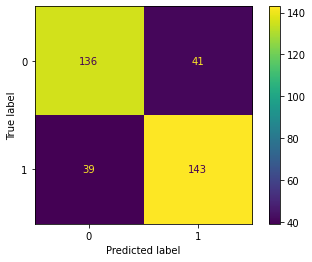

In [27]:
evaluation_baseline = evaluation_metrics(SVM_baseline, x_test_baseline, y_test)

Accuracy score: 0.799
Confusion matrix:
[[140  37]
 [ 35 147]]
Precision score: 0.799
Recall score: 0.808


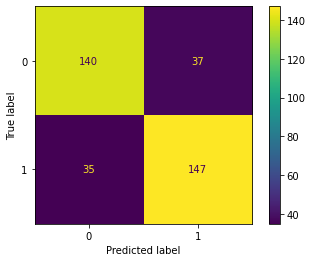

In [28]:
evaluation_porter = evaluation_metrics(SVM_porter, x_test_porter, y_test)

Accuracy score: 0.783
Confusion matrix:
[[138  39]
 [ 39 143]]
Precision score: 0.786
Recall score: 0.786


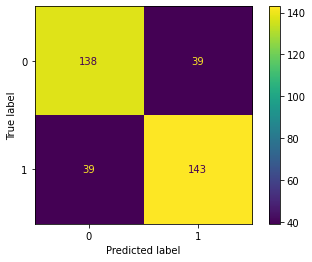

In [29]:
evaluation_snowball = evaluation_metrics(SVM_snowball, x_test_snowball, y_test)

Accuracy score: 0.813
Confusion matrix:
[[141  36]
 [ 31 151]]
Precision score: 0.807
Recall score: 0.83


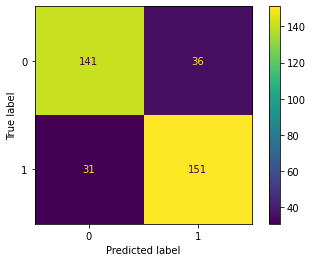

In [30]:
evaluation_lancaster = evaluation_metrics(SVM_lancaster, x_test_lancaster, y_test)

Accuracy score: 0.78
Confusion matrix:
[[137  40]
 [ 39 143]]
Precision score: 0.781
Recall score: 0.786


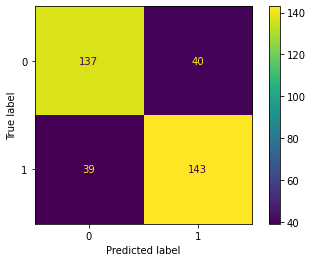

In [31]:
evaluation_lemma = evaluation_metrics(SVM_lemma, x_test_lemma, y_test)

Accuracy score: 0.749
Confusion matrix:
[[134  43]
 [ 47 135]]
Precision score: 0.758
Recall score: 0.742


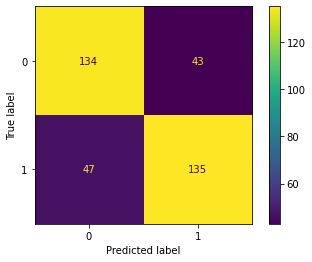

In [32]:
evaluation_lovins = evaluation_metrics(SVM_lovins, x_test_lovins, y_test)